## 1448. Count Good Nodes in Binary Tree

<div class="elfjS" data-track-load="description_content"><p>Given a binary tree <code>root</code>, a node <em>X</em> in the tree is named&nbsp;<strong>good</strong> if in the path from root to <em>X</em> there are no nodes with a value <em>greater than</em> X.</p>

<p>Return the number of <strong>good</strong> nodes in the binary tree.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<p><strong><img alt="" src="https://assets.leetcode.com/uploads/2020/04/02/test_sample_1.png" style="width: 263px; height: 156px;"></strong></p>

<pre><strong>Input:</strong> root = [3,1,4,3,null,1,5]
<strong>Output:</strong> 4
<strong>Explanation:</strong> Nodes in blue are <strong>good</strong>.
Root Node (3) is always a good node.
Node 4 -&gt; (3,4) is the maximum value in the path starting from the root.
Node 5 -&gt; (3,4,5) is the maximum value in the path
Node 3 -&gt; (3,1,3) is the maximum value in the path.</pre>

<p><strong class="example">Example 2:</strong></p>

<p><strong><img alt="" src="https://assets.leetcode.com/uploads/2020/04/02/test_sample_2.png" style="width: 157px; height: 161px;"></strong></p>

<pre><strong>Input:</strong> root = [3,3,null,4,2]
<strong>Output:</strong> 3
<strong>Explanation:</strong> Node 2 -&gt; (3, 3, 2) is not good, because "3" is higher than it.</pre>

<p><strong class="example">Example 3:</strong></p>

<pre><strong>Input:</strong> root = [1]
<strong>Output:</strong> 1
<strong>Explanation:</strong> Root is considered as <strong>good</strong>.</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li>The number of nodes in the binary tree is in the range&nbsp;<code>[1, 10^5]</code>.</li>
	<li>Each node's value is between <code>[-10^4, 10^4]</code>.</li>
</ul></div>

In [1]:
import numpy as np
from typing import List, Optional
%load_ext memory_magics

# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [2]:
from graphviz import Digraph
from collections import deque 

def build_tree(values):
    if not values:
        return None
    iter_values = iter(values)
    root = TreeNode(next(iter_values))
    queue = deque([root])
    while queue:
        node = queue.popleft()
        try:
            left_val = next(iter_values)
            if left_val is not None:
                node.left = TreeNode(left_val)
                queue.append(node.left)
            right_val = next(iter_values)
            if right_val is not None:
                node.right = TreeNode(right_val)
                queue.append(node.right)
        except StopIteration:
            break
    return root

def plot_tree(node, graph=None, node_id=0):
    if graph is None:
        graph = Digraph()
        graph.attr(size='8,8')
    if node is not None:
        graph.node(str(node_id), str(node.val))
        if node.left:
            graph.edge(str(node_id), str(2 * node_id + 1))
            plot_tree(node.left, graph, 2 * node_id + 1)
        if node.right:
            graph.edge(str(node_id), str(2 * node_id + 2))
            plot_tree(node.right, graph, 2 * node_id + 2)
    return graph

## Solution 1

In [3]:
class Solution:
    def goodNodes(self, root: TreeNode) -> int:
        n = 1
        if root.left is None and root.right is None:
            return 1

        if root.left is not None:
            if root.left.val>=root.val:
                n+=1
            else:
                root.left.val=root.val
            n += self.goodNodes(root.left)-1
        if root.right is not None:
            if root.right.val>=root.val:
                n+=1
            else:
                root.right.val=root.val
            n += self.goodNodes(root.right)-1
        return n
        

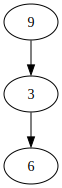

In [4]:
tree1 = build_tree(iter([9,None,3,6]))
plot_tree(tree1)

In [5]:
%%time
solution = Solution()
solution.goodNodes(tree1)

CPU times: user 34 µs, sys: 8 µs, total: 42 µs
Wall time: 46.7 µs


1

## Solution 2

In [6]:
class Solution:
    def goodNodes(self, root: TreeNode) -> int:
        # Stack for DFS: (node, max_val) where max_val is the max value in the path from the root to the current node
        stack = [(root, root.val)]
        good_nodes_count = 0
        
        while stack:
            node, max_val = stack.pop()
            
            # Check if the current node is a good node
            if node.val >= max_val:
                good_nodes_count += 1
            
            # Update max_val to be the maximum of max_val and the current node's value
            new_max_val = max(max_val, node.val)
            
            # Add children to stack with the updated max_val
            if node.right:
                stack.append((node.right, new_max_val))
            if node.left:
                stack.append((node.left, new_max_val))
        
        return good_nodes_count
    

In [7]:
%%time
solution = Solution()
solution.goodNodes(tree1)

CPU times: user 21 µs, sys: 1 µs, total: 22 µs
Wall time: 23.6 µs


3